In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
# %matplotlib inline

import geometry
import model
import solvers_TBF as solvers

In [2]:
mesh, BCs = geometry.getArcTruss()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(1, 0)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

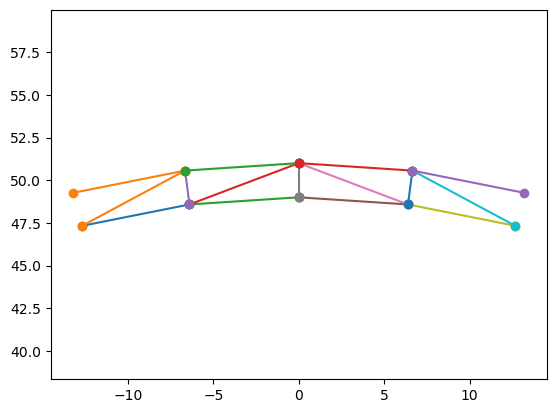

In [3]:
modelA.plotUndeformed()

In [12]:
solver = solvers.Static()

# solver.setConstraint('Load')
# solver.setConstraint('Displacement')
# solver.setConstraint('Riks')
solver.setConstraint('Arc')
solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)

In [13]:
# Load control
# x, c = solver.solve(modelA, 0.0025*np.ones(22))
# x, c = solver.solve(modelA, 0.0025*np.ones(50))

# Displacement control
# x, c = solver.solve(modelA, -0.005*np.ones(275))

# Riks constraint
# x, c = solver.solve(modelA, 0.005*np.ones(250))
# x, c = solver.solve(modelA, 0.045*np.ones(120))

# Arc-length
x, c = solver.solve(modelA, 0.025*np.ones(450))

  0%|          | 0/450 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.848e-09
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 5.380e-09
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 7.560e-09
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 9.380e-09
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.083e-08
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.190e-08
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.260e-08
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.291e-08
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.286e-08
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.244e-08
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.171e-08
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

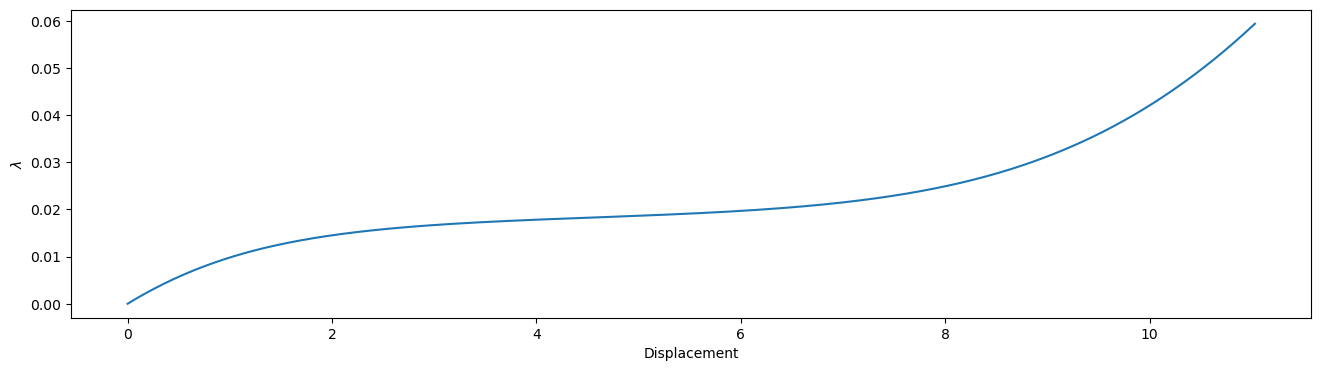

In [14]:
plt.figure(figsize=(16, 4))
plt.plot(x, c)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

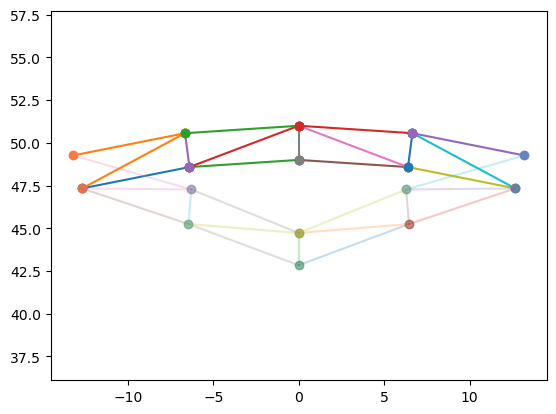

In [15]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)